[Reference](https://medium.com/@johnidouglasmarangon/%EF%B8%8F-how-to-use-cross-validation-to-train-models-in-scikit-learn-f94518de8e2d)

In [1]:
from sklearn.datasets import load_iris


iris = load_iris()
X, y = iris.data, iris.target

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier


pipe = Pipeline(
  [
      ("scalar", StandardScaler()),
      ("pca", PCA(n_components=3)),
      ("estimator", DecisionTreeClassifier()),
  ],
  verbose=True,
)

In [3]:
from sklearn.model_selection import cross_val_score


CV = 5

scoring = "accuracy"

scores = cross_val_score(pipe, X, y, scoring=scoring, cv=CV)
print(f"{scoring}: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipel

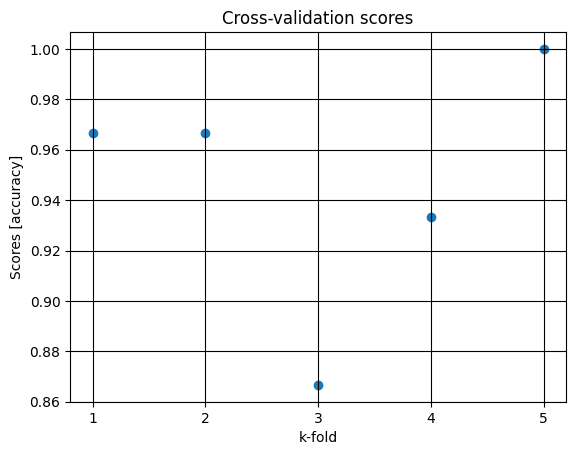

In [4]:
import matplotlib.pyplot as plt
import numpy as np


folds = np.arange(1, CV + 1)

plt.rc('grid', linestyle="-", color='black')
plt.scatter(x=folds, y=scores)
plt.xticks(folds)

plt.grid(True)

plt.title(f"Cross-validation scores")

plt.xlabel("k-fold")
plt.ylabel(f"Scores [{scoring}]")

plt.show()

In [5]:
scores = cross_val_score(pipe, X, y, scoring='f1_macro', cv=CV)
scores

[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipel

array([0.96658312, 0.96658312, 0.86531987, 0.93333333, 1.        ])

In [6]:
from sklearn.model_selection import cross_val_predict


CV = 5

y_pred = cross_val_predict(
    pipe,
    X,
    y,
    cv=CV,
)

[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipel

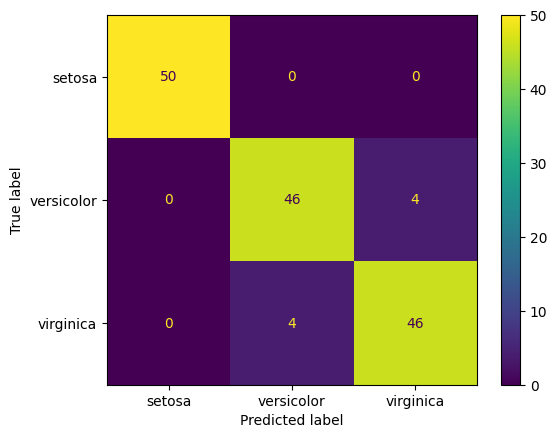

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, y_pred),
                              display_labels=iris.target_names)
cm.plot();

In [8]:
from sklearn.metrics import classification_report


print(classification_report(y, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.92      0.92        50
   virginica       0.92      0.92      0.92        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [9]:
import pickle


pipe.fit(X, y)

with open("pipe.bin", "wb") as f:
    pickle.dump(pipe, f)

[Pipeline] ............ (step 1 of 3) Processing scalar, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing estimator, total=   0.0s


In [10]:
with open("pipe.bin", "rb") as f:
    _pipe = pickle.load(f)

    X_pred = [[3, 2, 4, 0.2], [  4.7, 3, 1.3, 0.2 ]]

    y_pred = _pipe.predict_proba(X_pred)

    for prediction in y_pred:
        for class_name, proba in zip(iris.target_names, prediction):
            print(f"{class_name}: {proba}")
        print("---")

setosa: 1.0
versicolor: 0.0
virginica: 0.0
---
setosa: 1.0
versicolor: 0.0
virginica: 0.0
---


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd


data = [
    ("Great for the jawbone.", "pos"),
    ("What a waste of money and time!.", "neg"),
    ("And the sound quality is great.", "pos"),
    ("I advise EVERYONE DO NOT BE FOOLED!", "neg"),
    ("The commercials are the most misleading.", "neg"),
    ("Doesn't hold charge.", "neg"),
    ("It has kept up very well.", "pos"),
]

df = pd.DataFrame(data, columns=['text','label'])

X, y = df.text, df.label

pipe = Pipeline(
    [
        ("vectorizer", TfidfVectorizer()),
        ("classifier", SVC(probability=True, random_state=42)),
    ],
    verbose=True,
)


n_splits = 2
cv = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

scoring = "accuracy"

scores = cross_val_score(pipe, X, y, scoring=scoring, cv=cv)
print(f"{scoring}: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
accuracy: 0.42 (+/- 0.17)


In [12]:
import pickle


pipe.fit(X, y)
with open("model.bin", "wb") as f:
    pickle.dump(pipe, f)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
